<a href="https://colab.research.google.com/github/ramafofa/Rede-Neural-com-Pytorch/blob/main/TESTE_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch
import numpy as np
from torch import nn


In [44]:
##Classe que representa a rede neural
class LineNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.camadas = nn.Sequential(
            nn.Linear(1, 1)
        )

    def forward(self, x):
        return self.camadas(x)

modelo = LineNetwork()
print(list(modelo.parameters()))


[Parameter containing:
tensor([[-0.0437]], requires_grad=True), Parameter containing:
tensor([-0.1232], requires_grad=True)]


In [45]:
#Preparar estrutura de dados
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand

In [46]:
#Classe que representa a amostra do conjunto de dados
class DatasetAlgebrico(Dataset):
  def __init__(self, f , interval, numero_amostras):
    X = urand.Uniform(interval[0], interval[1]).sample([numero_amostras])
    self.data = [(x, f(x) ) for x in X]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    return self.data[index]

In [47]:
#função para o treinamento
linha = lambda x: 2*x +3
interval = (-10, 10)
amostras_para_treinamento = 1000
amostras_para_teste = 100

In [48]:
#Treinamento
treinar_dataset =  DatasetAlgebrico(linha,
                                    interval,
                                    amostras_para_treinamento)
testar_dataset = DatasetAlgebrico(linha,
                                  interval,
                                  amostras_para_teste)

treinar_dataloader = DataLoader(treinar_dataset,
                                batch_size = amostras_para_treinamento,
                                shuffle=True)
testar_dataloader = DataLoader(treinar_dataset,
                                batch_size = amostras_para_teste,
                                shuffle=True)

##🧩 Resumo 1:

Nessa primeira parte do código, a gente começa importando as bibliotecas que necessárias pra montar e treinar a rede neural. O PyTorch é o principal aqui, porque é ele que permite criar a estrutura do modelo e lidar com os dados de forma mais prática.

Depois, criamos uma classe que representa a rede neural em si. Ela é bem simples: tem só uma camada linear, que serve pra aprender uma relação do tipo y = ax + b. Ou seja, a rede vai tentar descobrir quais valores de a e b fazem a reta ficar o mais parecida possível com a função original que a gente quer ensinar pra ela. Tipo aquilo que vimos na escola de plano cartesiano e, dependendo dos valores das variáveis, uma linha é traçada de determinada forma no plano.

Em seguida, vem a classe que cria o conjunto de dados (dataset). Essa parte gera vários valores de entrada x dentro de um intervalo, e aplica a função f(x) pra calcular a saída. Assim, a gente monta um conjunto de pares (entrada, saída), que é o que o modelo vai usar pra aprender e testar.


Por fim, definimos algumas variáveis pra dizer qual é o intervalo dos valores de entrada, quantas amostras vão ser usadas pra treino e quantas pra teste. Esses dados são então organizados em estruturas chamadas DataLoaders, que têm como função alimentar a máquina com os dados e, assim, treiná-la!
O batch_size é o tamanho dos “grupinhos” de dados que a rede usa pra aprender. Em vez de mandar tudo de uma vez, a gente envia de pouco em pouco, o que ajuda o treino a ser mais eficiente. Aqui, foi atribuido a ele o número total de amostras de teste e treino, então a rede vê todos os dados por etapas e calcula a perda (loss) de forma mais precisa.

#Analogia sobre a função do DataLoader 👶
É como ter um bebê que acabou de começar a comer alimentos sólidos: O recomendado (geralmente) pelos pediatras é que os pais ofereçam sempre algo novo e deixem o bebê comer sozinho, porque isso ajuda ele a aprender (tipo descobrir como descascar uma banana vs uma tangerina), entender diferentes padrões, cores e texturas. Essa abordagem nutricional  ajuda muito no desenvolvimento da criança, pois dá pra ela um leque de diferentes padrões, assim como a máquina, que precisa ser alimentada com diferentes dados pra "entender o que é uma banana e o que é uma tanjerina!".


In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"
modelo.to(device)
print(f"Rodando em {device}")

Rodando em cuda


In [50]:
lossfunc = nn.MSELoss()
optmizer = torch.optim.SGD(modelo.parameters(), lr=0.001)


In [51]:
def treinamento(modelo, lossfunc, optimizer, dataloader):
  modelo.train()
  cumloss = 0.0
  for X, y in dataloader:
    X = X.unsqueeze(1).float().to(device)
    y = y.unsqueeze(1).float().to(device)

    pred = modelo(X)
    loss = lossfunc(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cumloss += loss.item()
  return cumloss / len(dataloader)

def teste(modelo, lossfunc, dataloader):
  modelo.eval()
  cumloss = 0.0
  with torch.no_grad():
    for X, y in dataloader:
     X = X.unsqueeze(1).float().to(device)
     y = y.unsqueeze(1).float().to(device)

    pred = modelo(X)
    loss = lossfunc(pred, y)
    cumloss += loss.item()
  return cumloss / len(dataloader)


In [54]:
epochs = 101
for t in range(epochs):
  treino_loss = treinamento(modelo, lossfunc, optmizer, treinar_dataloader)
  if t % 10 ==0:
    print(f"Epoch {t} | Treino Loss: {treino_loss:.4f}")
  teste_loss = teste(modelo, lossfunc, testar_dataloader)
  print(f"Teste Loss: {teste_loss:.4f}")


Epoch 0 | Treino Loss: 6.4630
Teste Loss: 0.6434
Teste Loss: 0.6416
Teste Loss: 0.6374
Teste Loss: 0.6328
Teste Loss: 0.6329
Teste Loss: 0.6346
Teste Loss: 0.6381
Teste Loss: 0.6241
Teste Loss: 0.6292
Teste Loss: 0.6219
Epoch 10 | Treino Loss: 6.2095
Teste Loss: 0.6141
Teste Loss: 0.6138
Teste Loss: 0.6158
Teste Loss: 0.6143
Teste Loss: 0.6063
Teste Loss: 0.6036
Teste Loss: 0.6026
Teste Loss: 0.5990
Teste Loss: 0.6013
Teste Loss: 0.5980
Epoch 20 | Treino Loss: 5.9659
Teste Loss: 0.5953
Teste Loss: 0.5859
Teste Loss: 0.5882
Teste Loss: 0.5824
Teste Loss: 0.5842
Teste Loss: 0.5846
Teste Loss: 0.5818
Teste Loss: 0.5784
Teste Loss: 0.5732
Teste Loss: 0.5773
Epoch 30 | Treino Loss: 5.7320
Teste Loss: 0.5710
Teste Loss: 0.5667
Teste Loss: 0.5666
Teste Loss: 0.5637
Teste Loss: 0.5564
Teste Loss: 0.5602
Teste Loss: 0.5616
Teste Loss: 0.5581
Teste Loss: 0.5567
Teste Loss: 0.5544
Epoch 40 | Treino Loss: 5.5072
Teste Loss: 0.5498
Teste Loss: 0.5450
Teste Loss: 0.5411
Teste Loss: 0.5372
Teste Loss

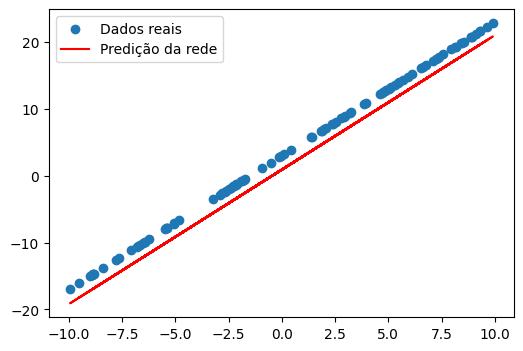

In [55]:
import matplotlib.pyplot as plt

modelo.eval()
X_plot, y_plot = next(iter(testar_dataloader))
X_plot = X_plot.unsqueeze(1).float().to(device)
y_plot = y_plot.unsqueeze(1).float().to(device)
y_pred = modelo(X_plot)

plt.figure(figsize=(6,4))
plt.scatter(X_plot.cpu().numpy(), y_plot.cpu().numpy(), label='Dados reais')
plt.plot(X_plot.cpu().detach().numpy(), y_pred.cpu().detach().numpy(), 'r-', label='Predição da rede')
plt.legend()
plt.show()


##Resumo Final – Treino, Teste e Ajuste de Pesos

Nessa etapa, passamos a rede para a fase de aprendizado real, usando os dados que criamos e organizamos na primeira parte do código.

# Funções de treino e teste

A função treinamento() percorre os dados em lotes (batches), calcula a predição do modelo e mede o erro usando MSELoss (Mean Squared Error, ou erro quadrático médio). É com base nesse erro que a rede ajusta seus pesos, usando o algoritmo de gradiente descendente.

A função teste() faz basicamente a mesma coisa, mas sem atualizar os pesos, pois ela serve só pra medir o desempenho real do modelo, e não ajustar.

# Gradiente descendente e otimização

A cada batch, zeramos os gradientes (pra que não acumulem), calculamos novos gradientes com loss.backward() e atualizamos os pesos com o otimizador SGD.

É como se a rede estivesse perdida no centro da cidade, perguntando pra várias pessoas “por onde eu vou?”.A cada resposta (cada atualização), ela entende um pouquinho melhor o caminho certo até chegar onde precisa (até traçar a reta do caminho certo).

# Tratamento de erros e estabilidade

O MSE mede quão longe a predição da rede está da resposta real, e a loss média por batch mostra como o modelo vai melhorando ao longo das epochs.
Formatar a loss com 4 casas decimais ajuda a acompanhar a evolução sem se perder em números gigantescos.

#📊 Visualização

“Tá, apareceu um monte de número. Isso é bom ou ruim?”
É aí que entra o nosso herói: Matplotlib! Que nos permite visualizar tudo de forma clara e bonitinha!
E, pelo que vimos, foram bons resultados!